# This notebook provides analysis tools for the Dryland Dynamics model.

### The implementation of the model is in the ``ecosystem/`` folder that includes Python files and a .json files with initial parameters. 

The dryland dynamics model is an agent-based simulation of spatial dynamics of vegetation in arid conditions. The environment is a grid of cells, representing a square piece of land. Each cell can either be degraded {-}, empty (unoccupied) {0} or vegetated {+}. The possible transitions are:

    degraded to empty: {-} to {0}
    empty to degraded: {0} to {-}
    empty to vegetated: {0} to {+}
    vegetated to empty: {+} to {0}
In this notebook some basic properties of the model are studied including density of vegetated states, flowlength, and clustering behaviour.

In [1]:
# Import the model and necessary packages
from ecosystem.model import EcoModel
import pandas as pd
import time


In [2]:
b = 0.4  # establishment probability
m = 0.1  # mortality rate

model = EcoModel(0.4, 0.1, "ecosystem/config_file.json")

num_steps = 50 # number of simulation steps

start_time = time.time()
for i in range(num_steps):
    model.step()
    
print(time.time()-start_time)

27.537060737609863


In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,b,flowlength,qminusminus,qminusplus,qplusplus
0,3920,4076,2004,0.369584,2.043221,0.801130,0.397330,0.206171
1,3607,4336,2057,0.369436,2.053193,0.806905,0.294442,0.254051
2,3475,4395,2130,0.368779,2.097299,0.810991,0.241628,0.301682
3,3391,4388,2221,0.368434,2.120462,0.811522,0.214918,0.339787
4,3361,4310,2329,0.368716,2.101525,0.808630,0.201982,0.369722
5,3330,4253,2417,0.369591,2.042735,0.806409,0.182423,0.392222
6,3313,4174,2513,0.370266,1.997386,0.802825,0.176250,0.412488
7,3306,4130,2564,0.371148,1.938148,0.800845,0.169169,0.422289
8,3279,4046,2675,0.371615,1.906811,0.797179,0.161215,0.444330
9,3216,4025,2759,0.372518,1.846137,0.789877,0.150870,0.448532


# Analysis of vegetation cover, its density and patchiness

In [4]:
from matplotlib import pyplot as plt

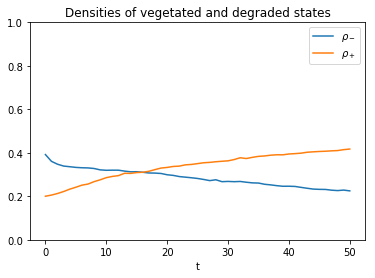

In [5]:
# Plot the global densities at each time step

total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.title("Densities of vegetated and degraded states")
plt.show()

## Plotting indicators of patch formation

   ### q+|+ average probability of having vegetated neighbours next to a vegetated site
   ### q-|+  average probability of having vegetated neighbours next to a degraded site
### c++ indicator of patchiness, i.e. vegetation cover consists of clusters divided by empty or degraded sites

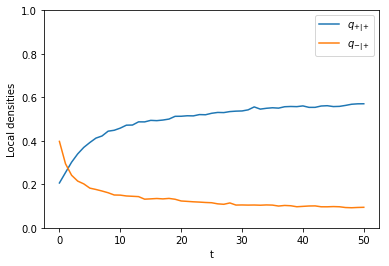

In [6]:
# Plot q+|+ and q-|+
plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qminusplus, label = r'$q_{-|+}$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.ylabel('Local densities')
plt.show()

/home/sesegma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


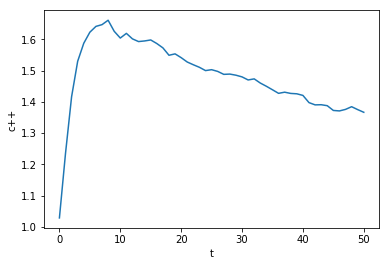

In [7]:
# Plot c++
plt.plot(stats.qplusplus/(stats.Vegetated/(total)))
plt.legend()
plt.ylabel('c++')
plt.xlabel('t')
plt.show()

## Infrequent rainfall simulation

The initial conditions and parameters used are the same as in fig. 3 of the 2013 paper by S. Kefi et al.: m = 0.1, c = 0.3, b = 0.4, d = 0.2, f = 0.8, r = 0, delta = 0. rhoplus = 0.1, rho_min = 0.8

The rain period is 10 steps, drought period is also 10 steps. These and other parameters can be reset in the accompanying .json file

### Run the cell below to gather your own data. Otherwise the data will be read from the files that are supplied 

In [8]:
# Uncomment the following lines to run the model and save the output into your own file
'''
# run model for 400 steps
model_rain = EcoModel(0.4, 0.1, "ecosystem/config_file_rain.json")
# keep track of time
start_time = time.time()
for i in range(500):
    model_rain.step()
    
print("Time simulation took:", time.time()-start_time)


stats = model.datacollector.get_model_vars_dataframe()
'''
# Save into output folder
#output_dir = "output/"
#stats.to_csv(output_dir+"stats_"+period+".csv", sep='\t')


'\n# run model for 400 steps\nmodel_rain = EcoModel(0.4, 0.1, "ecosystem/config_file_rain.json")\n# keep track of time\nstart_time = time.time()\nfor i in range(500):\n    model_rain.step()\n    \nprint("Time simulation took:", time.time()-start_time)\n\n\nstats = model.datacollector.get_model_vars_dataframe()\n'

## The following analysis shows how the state of the system depends on rainfall patterns.


In [10]:
# read from csv's
data_dir = "data/"
period = "100" # also can be 10, 25, 50, or 100
stats = pd.read_csv(output_dir+"stats_"+period+".csv", delimiter='\t')

total = (stats.Degraded+stats.Vegetated+stats.Empty)

# throw away data after density of vegetated sites becomes too low
for i in range(len(stats.Vegetated)):
    if (stats.Vegetated[i] / total[i]) < 0.01:
        stop = i
        break
    else:
        stop = 500
stats = stats[:stop + 1]

# figure with rainfall addition
# plot the global densities at each time step
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$', c='r')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$', c='g')
plt.legend(loc='center right')
plt.ylabel('Global Densities')
plt.xlabel('t')

# add rainfall color to plot
plt.xlim([0, stop + 1])
plt.ylim([0, 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

FileNotFoundError: File b'output/stats_100.csv' does not exist

In [ ]:
# plotting establishment probability
plt.plot(stats.b, label = 'b', c='b')
plt.ylabel('Establishment probability (b)')
plt.xlabel('t')
plt.xlim([0, stop + 1])
plt.ylim([0, 0.5])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

In [ ]:
# plotting flowlength
plt.plot(stats.flowlength, label = 'flowlength', c='b')
plt.ylabel('FL')
plt.xlabel('t')
plt.xlim([0, stop + 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

In [ ]:
# plotting the clustering index
plt.plot(stats.qplusplus/(stats.Vegetated/(total)), label = r'$c_{++}$', c='b')
plt.xlim([0, stop + 1])
plt.ylabel('$c_{++}$')
plt.xlabel('t')
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()